In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
import seaborn as sns
import cv2

In [0]:
def plot_loss(x, vy, ty, xlabel='Epoch', ylabel='Categorical Crossentropy Loss'):
  _, = plt.plot(x, vy, 'b', label="Validation Loss")
  _, = plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  
  plt.grid()
  plt.legend()
  plt.grid()
  plt.show()

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

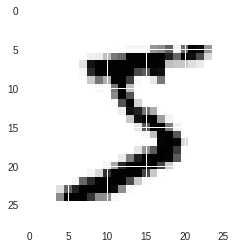

In [17]:
plt.imshow(X_train[0])

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [20]:
# print(X_train[0])
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **MLP with 2 Hidden Layers (H1_700 >> H2_180)**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 700)               549500    
_________________________________________________________________
dense_35 (Dense)             (None, 180)               126180    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1810      
Total params: 677,490
Trainable params: 677,490
Non-trainable params: 0
_________________________________________________________________
None

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 4s 103us/step - loss: 0.2590 - acc: 0.9248 - val_loss: 0.1388 - val_acc: 0.9587
Epoch 2/20
42000/42000 [==============================] - 3s 62us/step - loss: 0.0926 - acc: 0.9714 - val_loss: 0.1132 - val_acc: 0.9666
Epoch 3/20
42000/42000 [==============================] - 3s 62us/ste

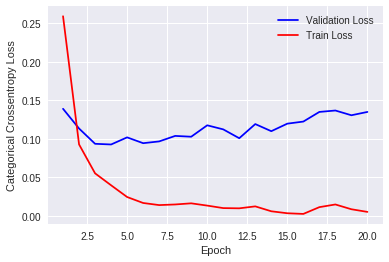

CPU times: user 1min 1s, sys: 8.64 s, total: 1min 10s
Wall time: 56.1 s


In [21]:
%%time
def build_ann_a(in_dim, out_dim=10):
  model = Sequential()
  model.add(Dense(700, activation='relu', kernel_initializer='he_normal', input_shape=(in_dim,)))
  
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  
  model.add(Dense(out_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

model = build_ann_a(X_train.shape[1])
print()
batch_size=128; epochs=20;
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3, verbose=1)
print()

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

# **MLP with 2 Hidden Layers with Batch Normalization (H1_700 >> H2_180)**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 700)               549500    
_________________________________________________________________
batch_normalization_28 (Batc (None, 700)               2800      
_________________________________________________________________
dense_38 (Dense)             (None, 180)               126180    
_________________________________________________________________
batch_normalization_29 (Batc (None, 180)               720       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1810      
Total params: 681,010
Trainable params: 679,250
Non-trainable params: 1,760
_________________________________________________________________
None

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 7s 168us/step - lo

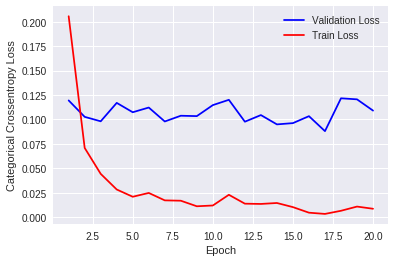

CPU times: user 1min 46s, sys: 15.8 s, total: 2min 1s
Wall time: 1min 32s


In [22]:
%%time
def build_ann_b(in_dim, out_dim=10):
  model = Sequential()
  model.add(Dense(700, activation='relu', kernel_initializer='he_normal', input_shape=(in_dim,)))
  model.add(BatchNormalization())
  
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  
  model.add(Dense(out_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

model = build_ann_b(X_train.shape[1])
print()
batch_size=128; epochs=20;
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3, verbose=1)
print()

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

# **MLP with 2 Hidden Layers with Dropout (H1_700 >> H2_180)**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 700)               549500    
_________________________________________________________________
dropout_24 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 180)               126180    
_________________________________________________________________
dropout_25 (Dropout)         (None, 180)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                1810      
Total params: 677,490
Trainable params: 677,490
Non-trainable params: 0
_________________________________________________________________
None

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 5s 116us/step - loss: 

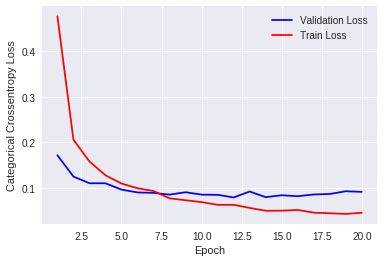

CPU times: user 1min 6s, sys: 9.21 s, total: 1min 15s
Wall time: 1min


In [23]:
%%time
def build_ann_c(in_dim, out_dim=10):
  model = Sequential()
  model.add(Dense(700, activation='relu', kernel_initializer='he_normal', input_shape=(in_dim,)))
  model.add(Dropout(0.5))
  
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  
  model.add(Dense(out_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

model = build_ann_c(X_train.shape[1])
print()
batch_size=128; epochs=20;
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3, verbose=1)
print()

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

# **MLP with 2 Hidden Layers with Batch Normalization & Dropout (H1_700 >> H2_180)**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 700)               549500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 700)               2800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 180)               126180    
_________________________________________________________________
batch_normalization_2 (Batch (None, 180)               720       
_________________________________________________________________
dropout_2 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1810      
Total para

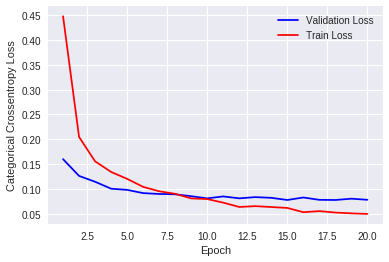

CPU times: user 1min 42s, sys: 16.2 s, total: 1min 58s
Wall time: 1min 30s


In [8]:
%%time
def build_ann_1(in_dim, out_dim=10):
  model = Sequential()
  model.add(Dense(700, activation='relu', kernel_initializer='he_normal', input_shape=(in_dim,)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(out_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

model = build_ann_1(X_train.shape[1])
print()
batch_size=128; epochs=20;
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3, verbose=1)
print()

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

# **MLP with 3 Hidden Layers with Batch Normalization & Dropout (H1_700 >> H2_350 >> H3_180)**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 700)               549500    
_________________________________________________________________
batch_normalization_12 (Batc (None, 700)               2800      
_________________________________________________________________
dropout_12 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 350)               245350    
_________________________________________________________________
batch_normalization_13 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_13 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 180)               63180     
__________

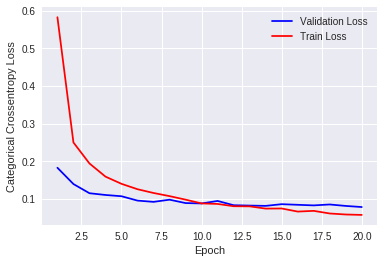

CPU times: user 6min 44s, sys: 23.9 s, total: 7min 8s
Wall time: 4min 6s


In [13]:
%%time
def build_ann_2(in_dim, out_dim=10):
  model = Sequential()
  model.add(Dense(700, activation='relu', kernel_initializer='he_normal', input_shape=(in_dim,)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(350, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(out_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

model = build_ann_2(X_train.shape[1])
print()
batch_size=128; epochs=20;
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3, verbose=1)
print()

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

# **MLP with 5 Hidden Layers with Batch Normalization & Dropout (H1_700 >> H2_350 >> H3_300 >> H4_200 >> H5_100)**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 700)               549500    
_________________________________________________________________
batch_normalization_23 (Batc (None, 700)               2800      
_________________________________________________________________
dropout_19 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 350)               245350    
_________________________________________________________________
batch_normalization_24 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_20 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 300)               105300    
__________

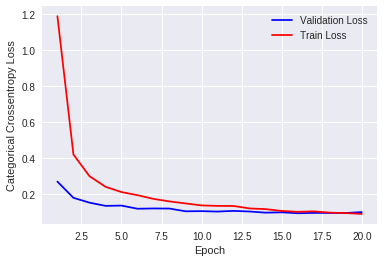

CPU times: user 3min 15s, sys: 29.5 s, total: 3min 44s
Wall time: 2min 48s


In [13]:
%%time
def build_ann_3(in_dim, out_dim=10):
  model = Sequential()
  model.add(Dense(700, activation='relu', kernel_initializer='he_normal', input_shape=(in_dim,)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(350, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(300, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(out_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

model = build_ann_3(X_train.shape[1])
print()
batch_size=128; epochs=20;
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3, verbose=1)
print()

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

# Conclusion :-
- From the first three Experiments, it is observed that Dropout reduces Overfitting - Networks without the Dropout layer is shown to exhibit low Train Loss and higher Test Loss. This difference is reduced when the Dropout Layer is introduced in the Neural Net.
- Subsequent increase in depth of the Network (3 and 5 Hidden Layers) shows not much improvement in the Test Accuracy. Infact, 5-layer deep MLP gave lower Accuracy than it's shallower counterparts.
- Also, the Crossover point between Train and Validation Loss is increasing as the Networks depth increases. This is evident from the Loss vs Epoch curves.